In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
prod_data = pd.read_csv('production_data.csv')
wells_data =  pd.read_csv('wellsData.csv')
op_aliasing_data = pd.read_csv('operator_aliasing.csv')

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [188]:
# dropping unnecessary columns from tables
cols = ['API', 'Year', 'Month', 'Liquid', 'Gas', 'RatioGasOil']
prod_data = prod_data[cols]

cols = ['API', 'CompletionDate', 'operatorNameIHS', 'BasinName']
wells_data = wells_data[cols]

cols = ['Name', 'Alias']
op_aliasing_data = op_aliasing_data[cols]

In [189]:
# adding zeros to API
wells_data['API'] = (wells_data['API']).astype(str)
wells_data['API'] = wells_data['API'].apply(lambda x: x.zfill(14))

In [190]:
# adding zeros to API
prod_data['API'] = (prod_data['API']).astype(str)
prod_data['API'] = prod_data['API'].apply(lambda x: x.zfill(14))

In [191]:
# renaming operators
alias_dict = dict(zip(op_aliasing_data.Name, op_aliasing_data.Alias))
wells_data['operatorNameIHS'] = wells_data['operatorNameIHS'].map(alias_dict).fillna(wells_data['operatorNameIHS'])

In [192]:
idx_max = prod_data.groupby(['API'])['Liquid'].transform('max') == prod_data['Liquid']
max_month_prod_data = prod_data[idx_max].drop_duplicates(subset='API', keep='first', inplace=False)
list_indices = ['API', 'Year', 'Month', 'Liquid']
max_month_prod_data = max_month_prod_data[list_indices]
max_month_prod_data = max_month_prod_data.rename(columns={"Year": "Max_Year", "Month": "Max_Month", "Liquid": "Max_Liquid"})

In [177]:
# merging the two dataframes to get max month and max year and removing rows with months =< peak_month
new_prod_data_orig = prod_data.merge(max_month_prod_data, on='API')

In [178]:
# Remove Pre-Peak Months (clean up)
new_prod_data = new_prod_data_orig[((new_prod_data_orig['Year'] == new_prod_data_orig['Max_Year']))]
new_prod_data = new_prod_data[((new_prod_data['Month'] >= new_prod_data['Max_Month']))]
new_prod_data2 = new_prod_data_orig[((new_prod_data_orig['Year'] > new_prod_data_orig['Max_Year']))]
new_prod_data3 = new_prod_data.append(new_prod_data2)

In [179]:
def calc_month_index(max_year, max_month, year, month):
    return (12 - max_month + (year - max_year - 1)*12 + month) * (year != max_year) + (year == max_year) * (month - max_month) + 1 

In [180]:
new_prod_data3['index'] = calc_month_index(new_prod_data3['Max_Year'], new_prod_data3['Max_Month'], new_prod_data3['Year'], new_prod_data3['Month'])
indexed_prod_data = new_prod_data3

# Problems encountered

## 1) 0 max liquid production, fixed by setting first month as peek month
## 2) missing months data in indexing months, fixed by super smart indexing equation
## 3) missing month data in plotting, will be fixed by moving average inshaAllah
## 4) UNKNOWN alias and operator


In [181]:
# TODO: disregard wells/basins? with less than 5 years production

In [210]:
wells_data[wells_data['CompletionDate'] < '2000-01-01'] #95420 - 93873

,API,CompletionDate,operatorNameIHS,BasinName
22,35125230620100,1993-04-01,PHOENIX OIL & GAS INCORPORATED,CHAUTAUQUA PLATFORM
31,49029206600100,1987-11-29,BREITBURN OPERATING LIMITED PARTNERSHIP,BIG HORN BASIN
34,35053222390000,1992-10-20,ANADARKO MINERALS INCORPORATED,ANADARKO BASIN
225,42105370780000,1996-02-13,EPIC PERMIAN OPERATING LLC,PERMIAN BASIN
292,42445315760000,1990-01-12,ENDEAVOR,PERMIAN BASIN
335,42105373870200,1997-02-04,EPIC PERMIAN OPERATING LLC,PERMIAN BASIN
344,42105376600000,1997-12-03,EPIC PERMIAN OPERATING LLC,PERMIAN BASIN
365,42501328550100,1995-03-01,OCCIDENTAL PERMIAN LIMITED,PERMIAN BASIN
393,42165353260100,1998-03-23,LYNX OPERATING COMPANY,PERMIAN BASIN
416,42329332700100,1997-01-10,CHEVRON U S A INCORPORATED,PERMIAN BASIN


In [182]:
wells_data_4basins = wells_data[wells_data['BasinName'] == 'DENVER BASIN']
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'PERMIAN BASIN'])
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'ANADARKO BASIN'])
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'WILLISTON BASIN'])
wells_data_4basins['API'] = wells_data_4basins['API'].astype(str)

In [183]:
indexed_wells_4basins = wells_data_4basins.merge(indexed_prod_data, on='API')

In [184]:
print(indexed_wells_4basins.groupby('BasinName'))
indexed_wells_4basins.groupby('index').mean()


,Year,Month,Liquid,Gas,RatioGasOil,Max_Year,Max_Month,Max_Liquid
index,,,,,,,,
1,2014.686575,6.643063,14756.960059,31016.676860,18.424992,2014.686575,6.643063,14782.253721
2,2014.714497,6.642878,10584.564862,27482.172501,30.443680,2014.635594,6.589713,14764.654808
3,2014.742503,6.733979,8485.865576,24454.298706,24.803495,2014.591030,6.551662,14677.663875
4,2014.787910,6.595492,7227.618924,22218.743044,20.554074,2014.543887,6.523759,14593.175050
5,2014.804368,6.701612,6271.884553,20431.160878,19.764677,2014.487277,6.506710,14465.736210
6,2014.837825,6.601953,5563.189260,18869.048794,24.487627,2014.429205,6.505399,14335.889071
7,2014.877807,6.491009,4990.200402,17456.167135,28.826315,2014.375397,6.519935,14225.192108
8,2014.896014,6.549294,4555.616283,16404.994578,33.266027,2014.312632,6.549876,14105.284897
9,2014.932227,6.434203,4175.499704,15372.818595,41.505832,2014.251994,6.597009,13974.515606


In [185]:
def get_stats(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)]
    group_liquid = group["Liquid"]
    mean = group_liquid.mean()
    median = group_liquid.median()
    perct = group_liquid.quantile(.9)
    liquid = group_liquid
    return [[mean], [median], [perct], liquid]

def mean_basin(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].mean()

def median_basin(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].median()

def percentile(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].quantile(.9)

def liquid(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group['Liquid']




In [215]:
pre2014[(pre2014['CompletionDate']< '2005-01-01') ]

,API,CompletionDate,operatorNameIHS,BasinName,Year,Month,Liquid,Gas,RatioGasOil,Max_Year,Max_Month,Max_Liquid,index


In [168]:
pre2014 = indexed_wells_4basins[indexed_wells_4basins['CompletionDate'] < '2014-01-01']
post2014 = indexed_wells_4basins[indexed_wells_4basins['CompletionDate'] >= '2014-01-01']
indices = np.arange(36) + 1
basins = ["ANADARKO BASIN","DENVER BASIN", "PERMIAN BASIN", "WILLISTON BASIN"]

all_stats_pre = np.array([[get_stats(y, x, pre2014) for x in indices] for y in basins]) 
all_stats_post = np.array([[get_stats(y, x, post2014) for x in indices] for y in basins]) 

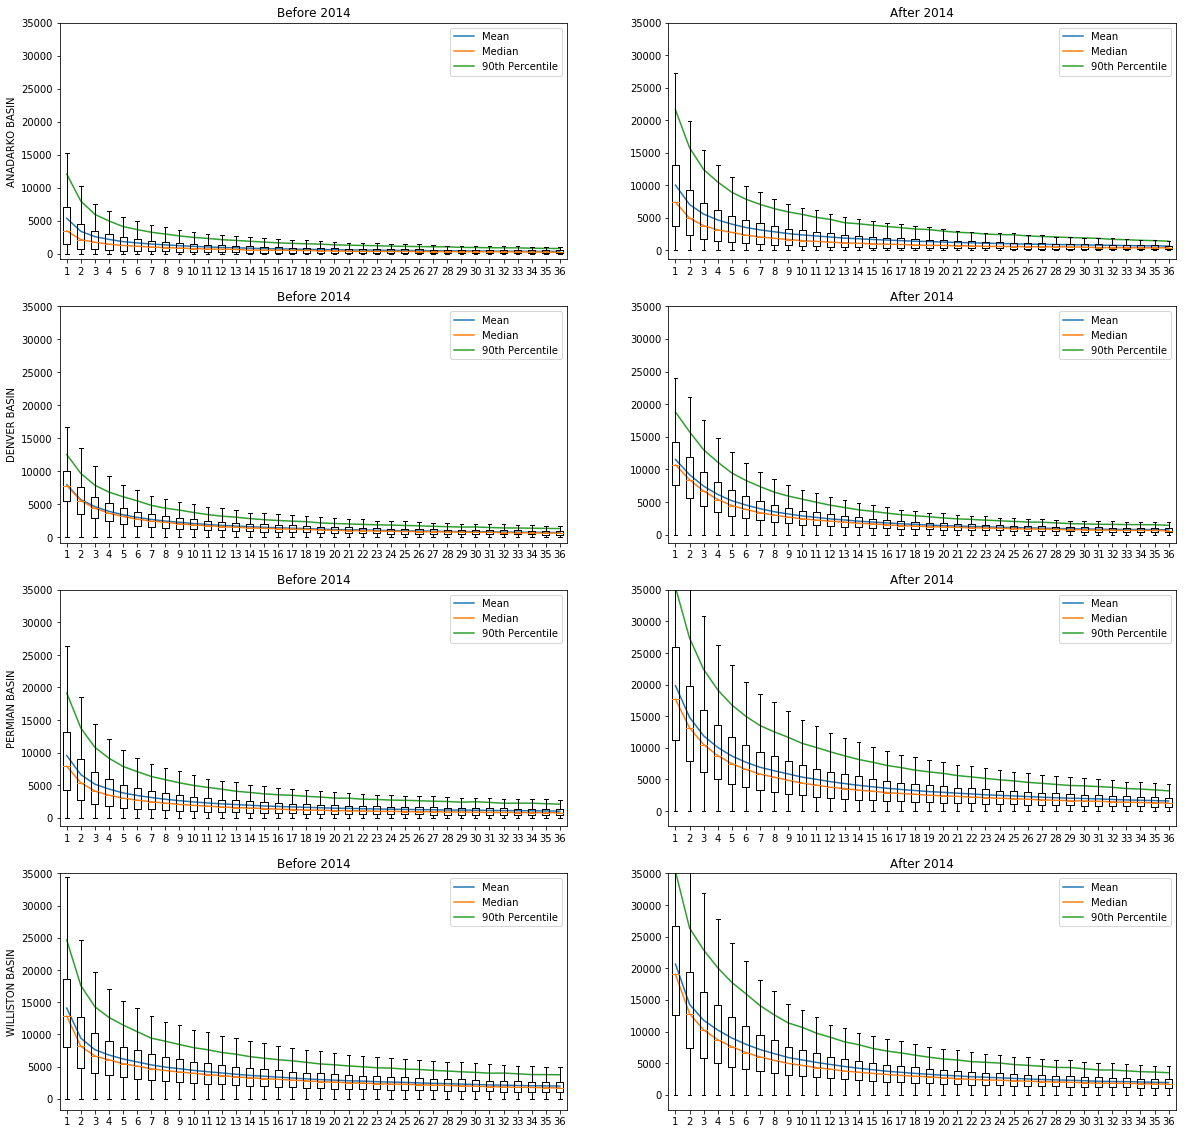

In [169]:
plt.rcParams["figure.figsize"]=20,20

idx = 1
for i in range(len(basins)):

    ax1 = plt.subplot(4,2,idx)
    ax1.plot(indices, np.hstack(all_stats_pre[i,:,0]), label="Mean")
    ax1.plot(indices, np.hstack(all_stats_pre[i,:,1]), label="Median")
    ax1.plot(indices, np.hstack(all_stats_pre[i,:,2]), label="90th Percentile")
    ax1.boxplot(list(all_stats_pre[i,:,3]), showfliers=False)
    ax1.set_ylim(top=35000)
    ax1.legend()
    ax1.set_title('Before 2014')
    ax1.set_ylabel(basins[i])
    idx += 1

    ax2 = plt.subplot(4,2,idx)
    ax2.plot(indices, np.hstack(all_stats_post[i,:,0]), label="Mean")
    ax2.plot(indices, np.hstack(all_stats_post[i,:,1]), label="Median")
    ax2.plot(indices, np.hstack(all_stats_post[i,:,2]), label="90th Percentile")
    ax2.boxplot(list(all_stats_post[i,:,3]), showfliers=False)
    ax2.set_ylim(top=35000)
    ax2.set_title('After 2014')
    ax2.legend()
    
    idx += 1
    
plt.savefig('part1.png')



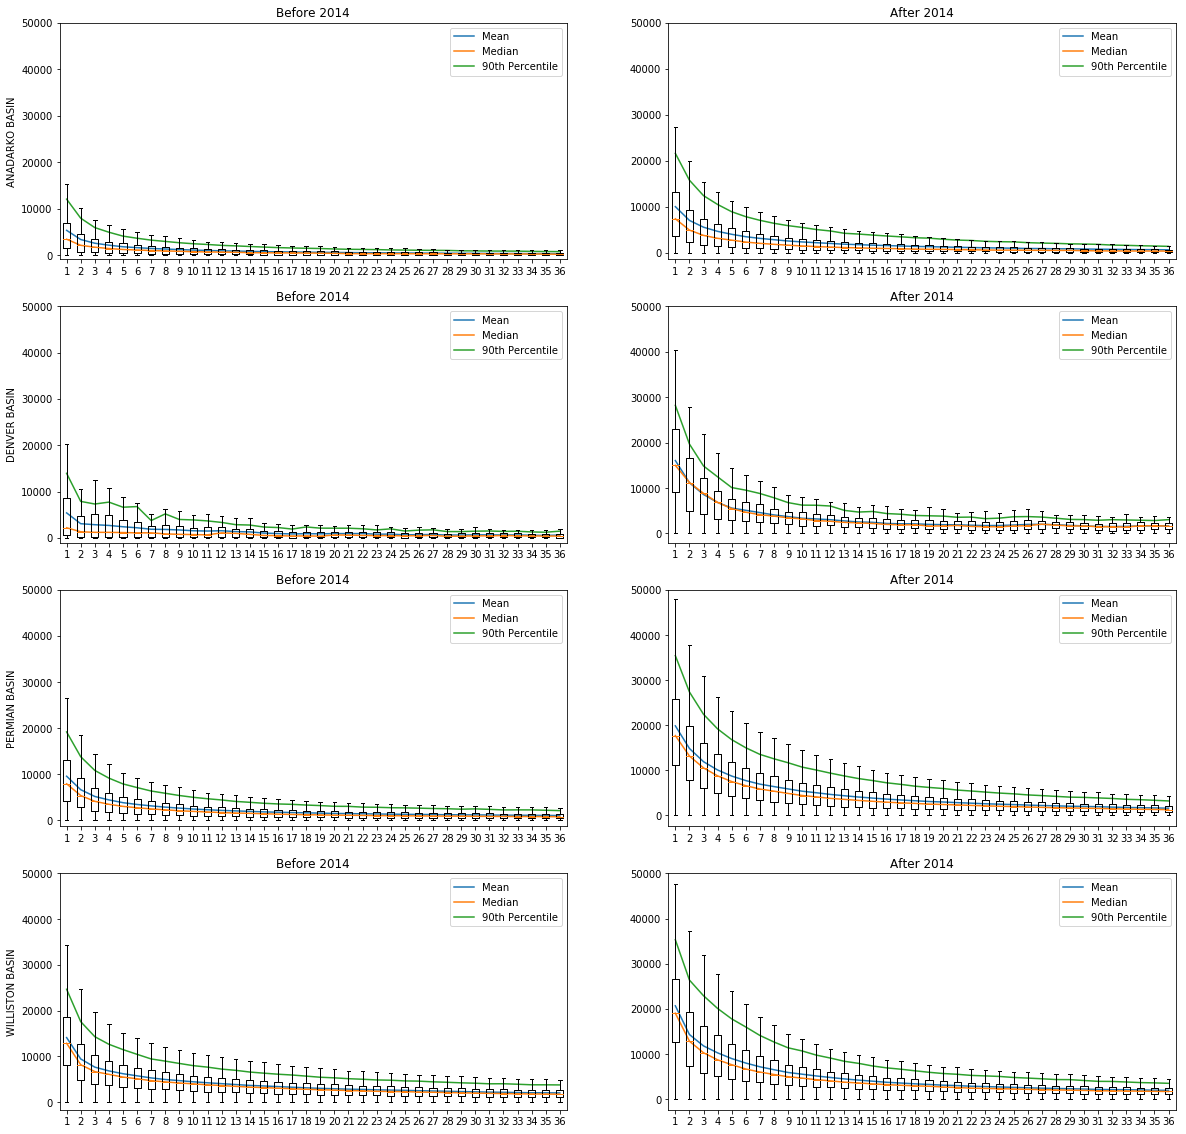

In [125]:
plt.rcParams["figure.figsize"]=20,20

idx = 1
for i in range(len(basins)):

    ax1 = plt.subplot(4,2,idx)
    ax1.plot(indices, means_pre[i], label="Mean")
    ax1.plot(indices, medians_pre[i], label="Median")
    ax1.plot(indices, percentiles_pre[i], label="90th Percentile")
    ax1.boxplot(liquid_pre[i], showfliers=False)
    ax1.set_ylim(top=50000)
    ax1.legend()
    ax1.set_title('Before 2014')
    ax1.set_ylabel(basins[i])
    idx += 1

    ax2 = plt.subplot(4,2,idx)
    ax2.plot(indices, means_post[i], label="Mean")
    ax2.plot(indices, medians_post[i], label="Median")
    ax2.plot(indices, percentiles_post[i], label="90th Percentile")
    ax2.boxplot(liquid_post[i], showfliers=False)
    ax2.set_ylim(top=50000)
    ax2.set_title('After 2014')
    ax2.legend()
    
    idx += 1

